# Fun with AI: LangChain and GPT-3.5 Turbo Unleashed. Meet Kangala!

Ravi Sankar Krothapalli  
2025-03-05

✍️ Note:

You can download the entire notebook from this link
<a target="_blank" rel="noopener noreferrer" href="https://github.com/rskrothapalli/notebooks/blob/d51a1d33e096f3535d1edd42968bc646a4a1bd9e/langchain_tutorial_p1.ipynb" class="alert-link">Fun
with AI: LangChain and GPT-3.5 Turbo Unleashed. Meet Kangala!</a>

## Introduction to LangChain

In this blog post, we will explore the fundamentals of LangChain,
highlighting some of its key features and demonstrating how it can
facilitate the development of intelligent applications. From setting up
your environment to creating engaging content, LangChain simplifies the
entire process, making it both straightforward and enjoyable. Join me on
this exciting journey and discover how LangChain can elevate your AI
projects to the next level!

### Setup the environment

To use the OpenAI API and other services securely, you need to create a
`.env` file in the root directory of your project. This file will store
your API keys and other sensitive information.

Add the following environment variable to the `.env` file:

> OPENAI_API_KEY=your_openai_api_key_here

By following these steps, you can securely manage your environment
variables and keep your sensitive information safe.

> **Note**
>
> **Before proceeding, please make sure to install the following
> libraries**:
>
>     ipykernel
>     jupyter
>     LangChain
>     LangChain-community
>     LangChain-openai
>     langgraph
>     nbclient
>     openai
>     python-dotenv
>     pyyaml

In [1]:
from rich import print
from dotenv import load_dotenv

if loading_envs := load_dotenv():
    print("Loaded environment variables")

Loaded environment variables

------------------------------------------------------------------------

### Generating fun facts about animals with OpenAI’s GPT-3.5 Turbo

Now, let’s have some fun with OpenAI’s GPT-3.5 Turbo model. We’re going
to generate some hilarious animal facts that will make you giggle! 🦥

The `chat.completions.create` endpoint is used to generate responses
from the model based on a given prompt.

This endpoint allows you to:

-   Specify the model (e.g., GPT-3.5 Turbo)

-   Provide messages, including system and user messages

-   Tailor the response with various parameters

In [2]:
from openai import AsyncOpenAI

llm_model = AsyncOpenAI()

# Invoke the model with the prompt and print the response
response = llm_model.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", 
         "content": """You are a helpful assistant. 
                       Your purpose is to share fun facts with a 5 year old.
                       Provide a friendly response and make it funny. 
                       Make sure each sentence appears in a new line and use Markdown and highlighting"""},
        {"role": "user", 
         "content": "Tell me 2 fun facts about sloths."}
    ]
)

llm_model_response = await response

print(llm_model_response.choices[0].message.content)

Sure, here are 2 fun facts about *sloths*:

** 1 . Sloths are super slow** 
Did you know that sloths are so slow that algae can actually grow on their fur? That's like having a little green 
garden on your back all the time!

** 2 . Sloths are great swimmers** 
Even though sloths are known for being slow on land, they are actually really good swimmers! They can hold their 
breath for up to 40 minutes underwater. Maybe they should compete in the next swimming competition! 🦥🌊

------------------------------------------------------------------------

### Using LangChain to generate fun facts about animals

LangChain makes working with language models even easier. It’s like
having a magic wand that simplifies everything! 🪄

The following code snippet demonstrates how to use LangChain’s
`ChatOpenAI` model to generate a to generate fun facts about animals.

Following are the some of the features of LangChain:

-   **Higher-level abstraction**: Simplifies working with language
    models.

-   **Complex workflows**: Easier management and integration with other
    tools.

-   **Conversational contexts**: Handles contexts effectively.

-   **Time-saving**: Reduces boilerplate code compared to direct OpenAI
    API usage.

#### **Initialize the model**

In [3]:
from langchain.chat_models import init_chat_model

fun_facts_chat_model = init_chat_model("gpt-3.5-turbo", model_provider="openai")

#### **Crafting the chat prompt message and invoking the model**

In [4]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("""You are a helpful assistant. 
                Your purpose is to share fun facts with a 5 year old.
                Provide a friendly response and make it funny. 
                Make sure each sentence appears in a new line and use Markdown and highlighting"""),
    HumanMessage("Tell me 2 fun facts about sloths."),
]

# Invoke the model with the created prompt and print the response
response = fun_facts_chat_model.invoke(messages)
print(response.content)

Absolutely! get ready for some fun sloth facts!

Did you know that sloths are known for being the slowest mammals on Earth? 🦥 They move so slowly that algae can 
grow on their fur - they're like walking, green, fuzzy gardens!

Also, sloths only come down from their trees once a week to go to the bathroom. Talk about being on a strict 
schedule! 🌳💩

#### **Generating prompt using Prompt Templates**

Creating effective prompts can be streamlined with Prompt Templates.
These templates allow you to define reusable and dynamic prompts with
placeholders, making them adaptable for various scenarios.

At runtime, these placeholders are replaced with actual values, ensuring
your prompts are always relevant and up-to-date. This method ensures
consistent and flexible prompt creation, maintaining a structured and
efficient process.

By using Prompt Templates, you can create prompts that are both
consistent and adaptable, making your workflow smoother and more
efficient.

In [5]:
from langchain.prompts import ChatPromptTemplate

# Create a prompt template
prompt_template = ChatPromptTemplate.from_messages([
    ("system", """You are a helpful assistant. 
                Your purpose is to share fun facts with a 5 year old.
                Provide a friendly response and make it funny. 
                Make sure each sentence appears in a new line and use Markdown and highlighting"""),
    ("user", "Tell me 2 fun facts about {animal}.")
])

# Create a prompt with the specified animal
prompt = prompt_template.invoke({"animal": "koalas"})
print(f"printing updated prompt: {prompt.to_messages()[1].content}\n")

# Invoke the model with the created prompt and print the response
response = fun_facts_chat_model.invoke(prompt)
print(response.content)

printing updated prompt: Tell me 2 fun facts about koalas.

Absolutely! 🐨

Did you know that koalas are often called "bears," but they are actually marsupials, which means they carry their 
babies in a pouch like a kangaroo? That's right, they are like the rockstars of the marsupial world! 🎸

And here's another one for you - Koalas have unique fingerprints, just like humans! So, if they ever need to solve 
a mystery, they can leave their prints behind as a clue. 🕵️‍♂️

------------------------------------------------------------------------

### Simple RAG Application

Finally, let’s build a simple Retrieval Augmented Generation (RAG)
application.

**`Retrieval Augmented Generation (RAG)`** is a technique that combines
document retrieval with language generation to produce accurate and
contextually relevant responses.

Let’s set the stage to demonstrate the power of RAG.

**Meet Kangala:**

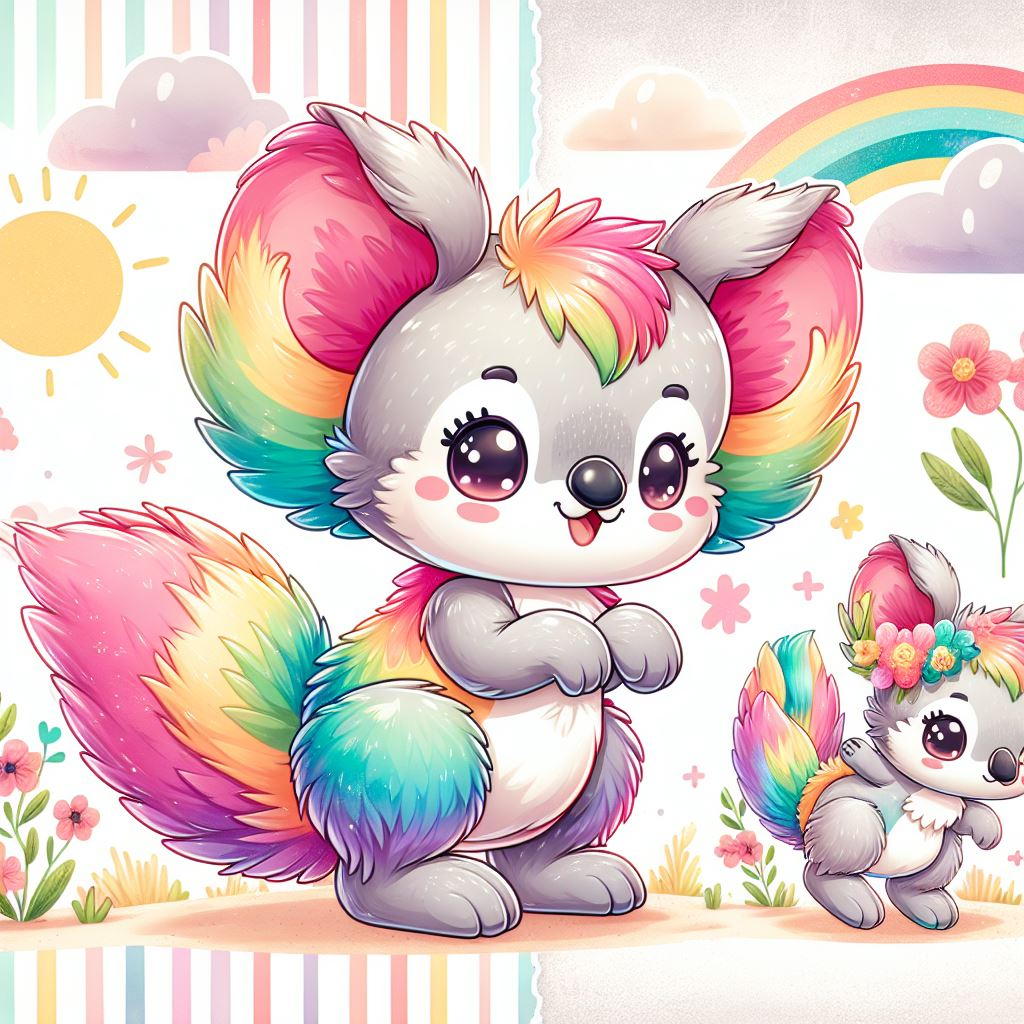 <small>generated using
copilot</small>

The Kangala is a whimsical creature with rainbow-colored fur that
sparkles in the sunlight and a playful expression that brings joy to
everyone who sees it.

Known for its ability to make flowers bloom wherever it goes, the
Kangala loves to jump around and play, making it a delightful companion
in any magical forest! 🌈🦄

**Why RAG?:**

Retrieval-Augmented Generation (RAG) is key to creating engaging content
about the whimsical Kangala. By combining document retrieval with
language generation, RAG ensures that fun facts are both accurate and
contextually relevant. This approach allows the application to deliver
delightful and informative responses, making the Kangala come alive in a
magical and entertaining way.

Here’s how you can create fun facts about the Kangala:

-   **Document Creation**: Store fun facts about the Kangala in an
    in-memory vector store.

-   **Embedding Generation**: Use OpenAI’s embedding model to create
    numerical representations of the documents.

-   **Similarity Search**: Retrieve the most relevant documents based on
    a query.

-   **Prompt Construction**: Construct a prompt using the retrieved
    documents.

-   Response Generation: Generate a response from the language model.

#### **Document creation**

In [6]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Kangalas have bright, rainbow-colored fur that sparkles in the sunlight.",
        metadata={"source": "imaginary-animals-doc"},
    ),
    Document(
        page_content="Kangalas can make funny, musical sounds that make everyone laugh and dance.",
        metadata={"source": "imaginary-animals-doc"},
    ),
    Document(
        page_content="Kangalas love to eat sweet fruits and berries, especially magical starberries.",
        metadata={"source": "imaginary-animals-doc"},
    ),
    Document(
        page_content="Kangalas can jump really high, almost like they have springs in their legs, and they love to play leapfrog.",
        metadata={"source": "imaginary-animals-doc"},
    ),
    Document(
        page_content="Kangalas can change the color of their fur to match their surroundings, just like a chameleon, making them great at hide and seek.",
        metadata={"source": "imaginary-animals-doc"},
    ),
    Document(
        page_content="Kangalas have a magical ability to make flowers bloom wherever they go, turning the dry lands into a colorful garden.",
        metadata={"source": "imaginary-animals-doc"},
    ),
]

#### **Similarity Search**

**Embeddings**  
`Embeddings` are a way to represent words, phrases, or even entire
documents as vectors (arrays of numbers) in a continuous vector space.
This allows machines to understand and process natural language in a
more meaningful way.

In our use case, Embeddings help capture the semantic meaning of
documents and their relationships to each other, which helpful in
information retrieval.

Imagine a catalog where each document is a puzzle piece. Document-level
embeddings transform each document into a unique shape that fits
perfectly with related documents. When you search for a specific topic,
it’s like finding the right pieces that fit together to form a coherent
picture. This helps in quickly retrieving the most relevant documents,
just as assembling the right puzzle pieces reveals the complete image.

`OpenAIEmbeddings` allows you to create embeddings for text using
OpenAI’s models. Embeddings are numerical representations of text that
capture the semantic meaning, making it easier to perform tasks like
similarity searches.

`InMemoryVectorStore` provides an in-memory storage solution for vectors
(embeddings). It allows you to add documents, store their embeddings,
and perform similarity searches.

In [7]:
from langchain_openai import OpenAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore

# Initialize OpenAI embeddings with the specified model
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Create an in-memory vector store to hold the embeddings
vector_store = InMemoryVectorStore(embeddings)

# Add the documents to the vector store
_ = vector_store.add_documents(documents=documents)

#### **Construct prompt and generate a response**

This code sets up a simple application using LangChain and LangGraph
frameworks. It defines a state that includes an animal name, a context
of documents, and an answer.

The application has two main functions:

-   Retrieve: This function searches for documents related to the given
    animal and updates the context with these documents.

-   Generate: This function uses the context to generate an answer based
    on a predefined prompt template and a chat model.

The application is then compiled into a state graph, which defines the
sequence of operations. Finally, the graph is executed with an initial
state, and the generated answer is printed. This setup allows for
efficient retrieval and generation of information based on the given
input.

In [8]:
from langchain_core.documents import Document
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict


prompt_template.append(
    {"role": "system", "content": "Context: {context} \n Answer: "})


# Define state for application
class State(TypedDict):
    animal: str
    context: List[Document]
    answer: str


def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["animal"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt_template.invoke(
        {"animal": state["animal"], "context": docs_content})
    response = fun_facts_chat_model.invoke(messages)
    return {"answer": response.content}


# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

response = graph.invoke({"animal": "Kangala"})
print(response["answer"])

Let me tell you something magical about Kangalas, friend!

**Fact # 1 :** Kangalas have the special power to turn a desert into a rainbow garden with just their presence. 🌈🌻

**Fact # 2 :** Their fur is like a sparkling rainbow under the sunlight, making them the fanciest creatures around! 
🌈🦄